In [10]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import datasets, layers, models
from keras.layers import LeakyReLU
import matplotlib.pyplot as plt

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [11]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [12]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='ReLU', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='ReLU'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='ReLU'))

model.add(layers.Flatten(name="flattenlayer"))
model.add(layers.Dense(64, activation='ReLU'))
model.add(layers.Dense(10))

In [14]:
# 1. Train CNN on MNIST with learning rate 1e-6 (very small) and for one epoch only.

lr = 1e-6
n_epochs = 1

optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=n_epochs, 
                    validation_data=(test_images, test_labels))

1875/1875 [==============================] - 20s 10ms/step - loss: 2.2882 - accuracy: 0.1167 - val_loss: 2.2640 - val_accuracy: 0.1678


In [15]:
# extract features
extractor = keras.Model(inputs=model.inputs,
                        outputs=model.get_layer(name="flattenlayer").output)

features = extractor.predict(train_images)



[0.17149043 0.08614393]


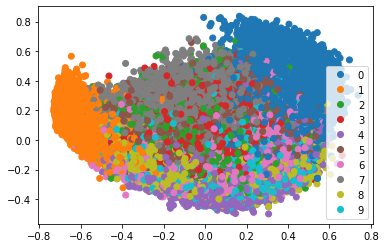

In [19]:
# PCA
pca = PCA(n_components = 2)
pca.fit(features)
print(pca.explained_variance_ratio_)


transformed_data = pca.transform(features)
from matplotlib.colors import ListedColormap
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
colors = ListedColormap(["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", 
          "tab:olive", "tab:cyan"])
values = []
i = 0
for point, label in zip(transformed_data, train_labels):
    print(f"[{i}]/[60000]", end="\r", flush=True)
    value = (label)
    values.append(value)
    i += 1
scatter = plt.scatter(x=transformed_data[:, 0], y=transformed_data[:, 1], c=values, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

